<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Дублирующиеся-записи" data-toc-modified-id="Дублирующиеся-записи-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дублирующиеся записи</a></span></li><li><span><a href="#Выбросы-в-данных" data-toc-modified-id="Выбросы-в-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Выбросы в данных</a></span></li><li><span><a href="#Мультиколлинеарность" data-toc-modified-id="Мультиколлинеарность-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Мультиколлинеарность</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Основной-пайплайн" data-toc-modified-id="Основной-пайплайн-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Основной пайплайн</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#StackingClassifier" data-toc-modified-id="StackingClassifier-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>StackingClassifier</a></span></li><li><span><a href="#Лучшая-модель" data-toc-modified-id="Лучшая-модель-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Лучшая модель</a></span></li><li><span><a href="#Важность-признаков" data-toc-modified-id="Важность-признаков-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Важность признаков</a></span></li></ul></li><li><span><a href="#Итоги" data-toc-modified-id="Итоги-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоги</a></span></li><li><span><a href="#Классификация-и-выгрузка-тестовых-данных-для-Kaggle" data-toc-modified-id="Классификация-и-выгрузка-тестовых-данных-для-Kaggle-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Классификация и выгрузка тестовых данных для Kaggle</a></span></li></ul></div>

<div class="alert alert-info">
Кочнев Анатолий Андреевич, 
    
https://t.me/AnatoKoch
    
https://github.com/AnatolyKochnev/practicum-data-science/blob/master/music-genre/kochnev-music-genre.ipynb
<div>

# Классификация музыкальных композиций

<b>Цель исследования:</b>
<br/>
Подобрать и обучить модель для классификации музыкальных произведений по жанрам. В конечном счете, модель должна повысить качество работы рекомендательной системы клиента. 

В качестве исходных данных есть таблица с характеристиками музыкальных произведений и их жанры. 
Теже характеристики предполагается использовать и при классификации композиций.
<br/>
<br/>
<b>Ход исследования:</b>
<br/>
В качестве исходных данных предоставлена таблица с характеристиками музыкальных произведений и их жанры. Этой информации должно быть достаточно для обучения модели.
<br/>
<br/>
<b>Этапы исследования:</b>
* Обзор данных.
* Базовая предобработка данных.
* Полноценный разведочный анализ.
* Проверка на мультиколлинеарность.
* Отбор финального набора обучающих признаков.
* Выбор и обучение нескольких моделей с целью поиска оптимальной.
* Итоговая оценка качества предсказания лучшей модели.
* Анализ важности ее признаков.
* Общий вывод.

## Обзор данных

In [2]:
!pip install phik

In [3]:
random_state = 12345

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.utils import shuffle, resample
from sklearn.pipeline import Pipeline, make_pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import set_config
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer

import phik
import seaborn as sns


set_config(display="diagram")
#from sklearn.base import _fit_context
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer

In [5]:
df = pd.read_csv('../../datasets/kaggle_music_genre_train.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.4800,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.2430,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.2280,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.0558,0.847,255987.0,0.873,0.000003,G#,0.325,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.2270,0.742,195333.0,0.575,0.000002,C,0.176,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative


* Поле **music_genre** - целевой признак, для прогнозирования которого будет использоваться модель.
* Поля **instance_id, track_name, obtained_date** напрямую никак не характеризуют музыкальные композиции и могут быть удалены из обучения.
* Поля **key** и **mode** - категориальные. Есть пустые значения, которые можно попробовать заменить константой. Кроме того, эти признаки предстоит закодировать.
* Поле **tempo** также содержит пустые значения. Можно заполнить медианой или средним.
* Величины числовых значений различаются - для некоторых моделей может потребоваться масштабирование.

Вышеперечисленные задачи по подготовке данных лучше заложить в пайплайн - к классифицируемым данным эти проблемы тоже относятся.

## Предобработка данных

### Дублирующиеся записи

In [6]:
df.duplicated().sum()

0

Полных дубликатов нет. Но можно проверить дубликаты по **instance_id** и **track_name**.

In [7]:
print('Дубли по id:', df.instance_id.duplicated().sum(), '| Дубли по имени:', df.track_name.duplicated().sum())

Дубли по id: 0 | Дубли по имени: 1751


Имена дублируются. Это может быть как нормальным явлением, так ошибками в данных. Стоит повторить проверку на дубликаты, но уже без лишних колонок.

In [8]:
df[df.drop(['instance_id', 'track_name', 'obtained_date'], axis=1).duplicated(keep=False)].sort_values('track_name').head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
9890,68462.0,Back To The Future,0.018600,0.583,180000.0,0.841,0.0000,D,0.105,-3.665,Major,0.1900,90.646,4-Apr,0.495,Electronic
8332,27101.0,Back To The Future (feat. ProbCause),0.018600,0.583,180000.0,0.841,0.0000,D,0.105,-3.665,Major,0.1900,90.646,4-Apr,0.495,Electronic
4945,61145.0,Extreme Ways (Bourne's Legacy),0.000417,0.466,290827.0,0.828,0.2050,B,0.335,-7.898,Minor,0.0518,104.495,4-Apr,0.299,Electronic
18071,23448.0,Extreme Ways (Bourne's Legacy) - Original Version,0.000417,0.466,290827.0,0.828,0.2050,B,0.335,-7.898,Minor,0.0518,104.495,4-Apr,0.299,Electronic
10089,21594.0,Forever - FuntCase Remix,0.013400,0.312,321600.0,0.981,0.0619,F,0.289,-2.788,Minor,0.3800,149.600,4-Apr,0.043,Electronic


Есть несколько полных дублей, различающихся по названию. Их можно полностью удалить из набора

In [9]:
df = df.drop_duplicates(subset=df.columns.difference(['instance_id', 'track_name', 'obtained_date']))
len(df[df.drop(['instance_id', 'track_name', 'obtained_date'], axis=1).duplicated()])
df.shape

(20387, 16)

Также, можно проверить дубли без учета классификации

In [10]:
df[df.drop(['instance_id', 'track_name', 'obtained_date', 'music_genre'], axis=1).duplicated(keep=False)].sort_values('track_name').head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
7581,77103.0,'75 aka Stay With You,0.030700,0.712,371507.0,0.827,0.795,C#,0.122,-7.331,Major,0.0414,126.001,4-Apr,0.305,Jazz
17628,71962.0,'75 aka Stay With You,0.030700,0.712,371507.0,0.827,0.795,C#,0.122,-7.331,Major,0.0414,126.001,4-Apr,0.305,Electronic
11638,60181.0,(Your Love Keeps Lifting Me) Higher & Higher,0.176000,0.631,181067.0,0.690,0.000,D,0.121,-6.676,Major,0.0531,94.574,4-Apr,0.938,Rock
15701,20145.0,(Your Love Keeps Lifting Me) Higher & Higher,0.176000,0.631,181067.0,0.690,0.000,D,0.121,-6.676,Major,0.0531,94.574,4-Apr,0.938,Blues
11895,29350.0,1 on 1,0.000525,0.905,192840.0,0.677,0.000,D,0.251,-7.987,Major,0.3450,140.882,4-Apr,0.598,Hip-Hop


Тут ситуация хуже. Дубли по-разному классифицируются как разные жанры. 
Возможно, Это ошибка сбора данных, вызванная подобными названиями композиций. 
Также, возможен вариант с принадлежностью к нескольким жанрам.

С одной стороны - это противоречивые сведения, которые будут сбивать модель.
С другой стороны - невозможно гарантированно определить принадлежность трека к жанру.
Наиболее надежное решение - удалить обе записи.

In [11]:
df = df.drop_duplicates(keep=False, subset=df.columns.difference(['instance_id', 'track_name', 'obtained_date', 'music_genre']))
len(df[df.drop(['instance_id', 'track_name', 'obtained_date', 'music_genre'], axis=1).duplicated()])
df.shape

(19411, 16)

### Выбросы в данных

In [12]:
hist_per_row = 3
height_per_row = 4

def check_emissions(df, numeric_columns, is_numeric=True):
    columns_count = len(numeric_columns)
    rows = int(columns_count / 3) + (1 if (columns_count % 3 > 0) else 0)
    if(is_numeric):
        display(df[numeric_columns].describe())
    
    axis = df[numeric_columns].hist(figsize=(20,height_per_row * rows), layout=(rows, hist_per_row));    
    pl.suptitle("Гистограммы признаков", y=0.91)
    for ax in axis.flatten():
        ax.set_xlabel("Значение признака")
        ax.set_ylabel("Вхождения")

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,19411.000000,19411.000000,1.941100e+04,19411.000000,19411.000000,19411.000000,19411.000000,19411.000000,18969.000000,19411.000000
mean,0.279040,0.559935,2.198772e+05,0.622607,0.164857,0.198583,-8.630723,0.090139,121.027061,0.462686
std,0.324236,0.172262,1.289928e+05,0.253356,0.310222,0.167625,5.577894,0.096842,30.452400,0.244172
min,0.000000,0.060000,-1.000000e+00,0.001010,0.000000,0.013600,-44.406000,0.022300,34.765000,0.000000
25%,0.015600,0.449000,1.763265e+05,0.465000,0.000000,0.097200,-10.365000,0.035600,95.961000,0.269000
50%,0.124000,0.568000,2.192630e+05,0.664000,0.000170,0.129000,-7.092000,0.048700,120.016000,0.455000
75%,0.481000,0.681000,2.664000e+05,0.830000,0.100000,0.251000,-5.067000,0.092950,141.980000,0.652000
max,0.996000,0.978000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.041000,0.992000


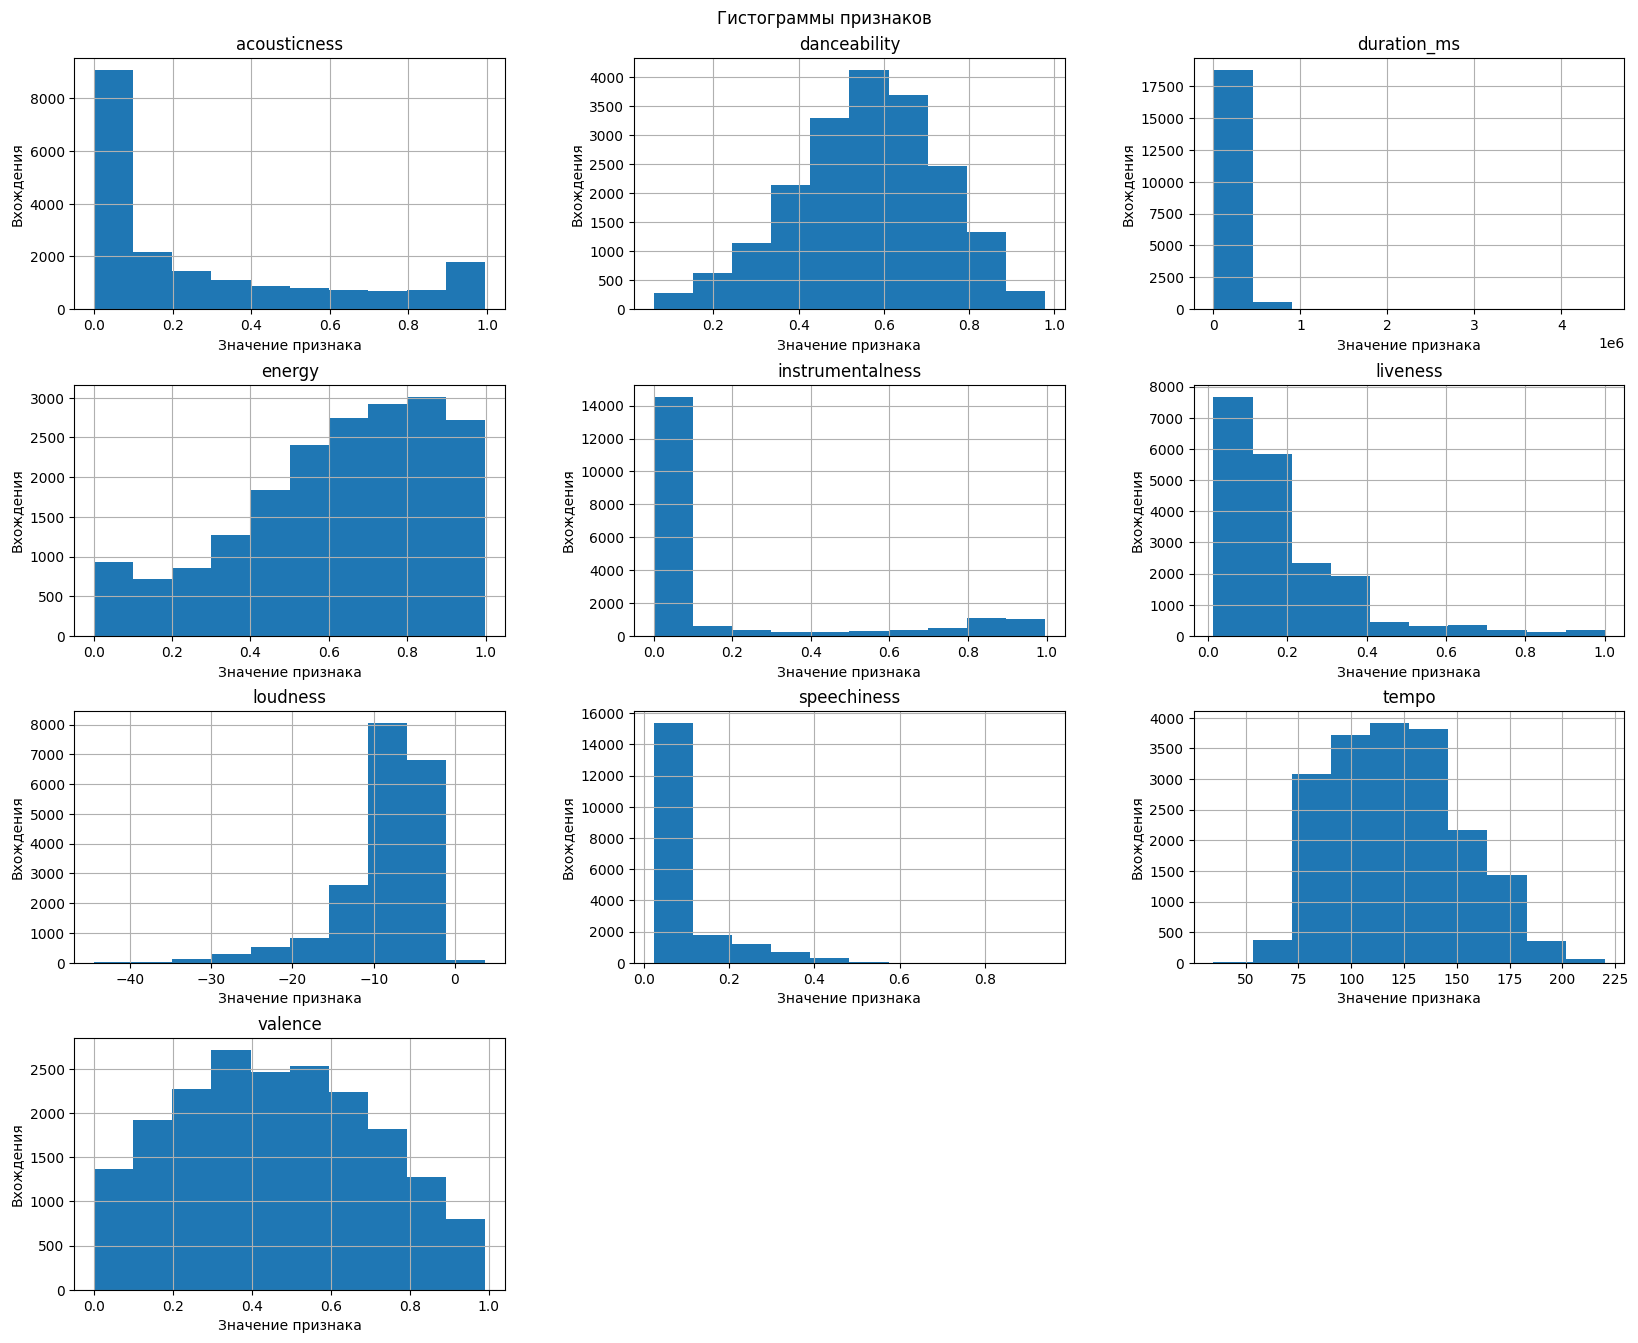

In [13]:
check_emissions(df, df.drop(['instance_id', 'track_name', 'obtained_date', 'music_genre'], axis=1).columns)

* Нормальное распределение. Явных выбросов нет.
* В поле **duration_ms** присутсвуют отрицательные значения. Это явная ошибка сбора данных. Их можно привести к среднему

### Мультиколлинеарность

interval columns not set, guessing: ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


<AxesSubplot:>

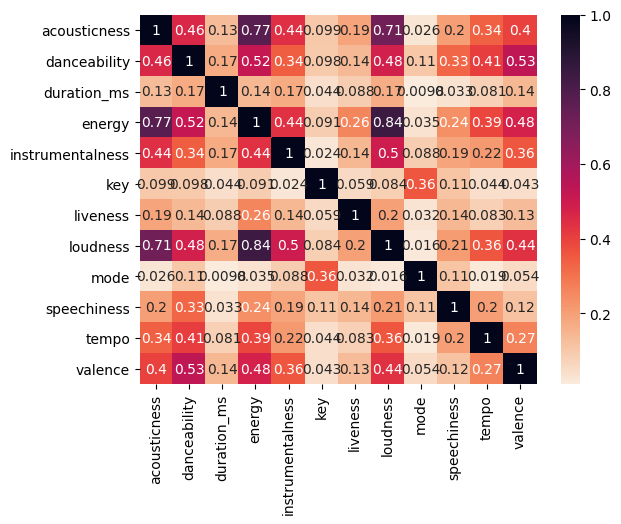

In [16]:
phik_matrix = df.drop(['instance_id', 'track_name', 'obtained_date', 'music_genre'], axis=1).phik_matrix()
sns.heatmap(phik_matrix, annot=True, cmap=sns.cm.rocket_r)

interval columns not set, guessing: ['acousticness', 'danceability', 'duration_ms', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


<AxesSubplot:>

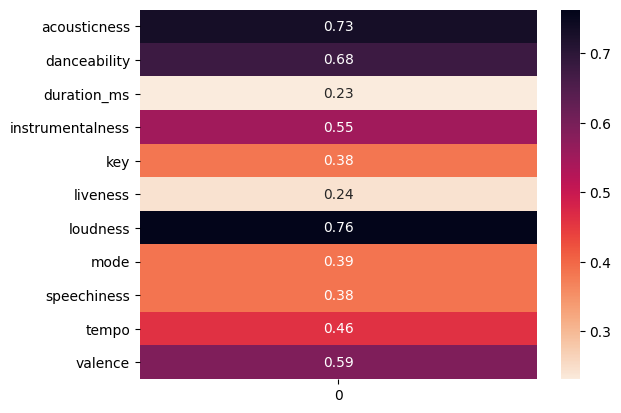

In [17]:
t1, t2 = df.drop(['instance_id', 'track_name', 'obtained_date', 'music_genre', 'energy'], axis=1).global_phik()
global_phik =  pd.DataFrame(t1, index=t2)
sns.heatmap(global_phik, annot=True, cmap=sns.cm.rocket_r)

По графикам видно, что **acousticness, energy, loudness** имеют большую корреляцию. Можно убрать из анализа **energy**.

interval columns not set, guessing: ['acousticness', 'danceability', 'duration_ms', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


<AxesSubplot:>

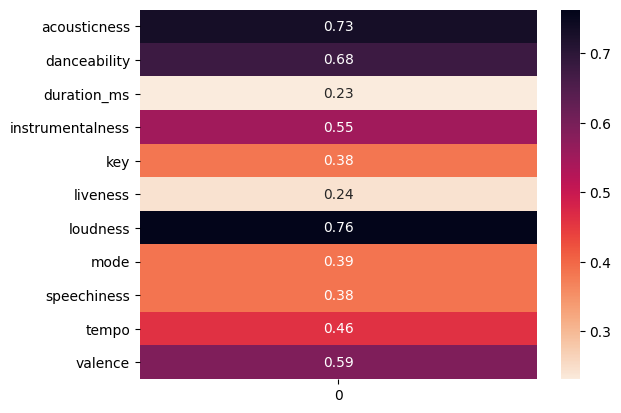

In [18]:
t1, t2 = df.drop(['instance_id', 'track_name', 'obtained_date', 'music_genre', 'energy'], axis=1).global_phik()
global_phik =  pd.DataFrame(t1, index=t2)
sns.heatmap(global_phik, annot=True, cmap=sns.cm.rocket_r)

## Обучение моделей

В итоге, из обучания моделей будут исключены признаки:
* как не значащие: **instance_id, track_name, obtained_date**
* как имеющий большую корреляцию с другими признаками: **energy**

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

class TransformColumn(BaseEstimator, TransformerMixin):
    def __init__(self, transformer, column):
        self.transformer = transformer
        self.column = column
        # body of the constructor
    
    def fit(self, X, y=None):
        if self.column in X.columns:
            self.transformer.fit(X[[self.column]])
        return self

    def transform(self, X, y=None):
        if self.column in X.columns:
            transformed_X = self.transformer.transform(X[[self.column]])
            new_X = X.copy()
            new_X[self.column] = transformed_X        
            return new_X
        return X

In [32]:
#обучение моделей будет выполняться с помощью GridSearchCV - разбивка на выборки не требуется
target = df['music_genre']
features = df[df.columns.drop(target.name)]

In [33]:
excessive_features = set(['instance_id', 'track_name', 'obtained_date', 'energy'])

def filter_by(column_names):
    return list(set(column_names) - excessive_features)

numerical_features = filter_by(features.select_dtypes(include='number').columns)
categorial_features = filter_by(features.select_dtypes(include=object).columns)

### Основной пайплайн

In [155]:
numeric_pipeline = Pipeline([
    ('fix_duration', TransformColumn(SimpleImputer(missing_values=-1, strategy='mean'), 'duration_ms')),
    ('fix_null', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', StandardScaler())
])
categorical_pipeline = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='missing'),
    OneHotEncoder(sparse_output=False, drop='first')
)
column_transformer = make_column_transformer(   
    (numeric_pipeline, numerical_features),
    (categorical_pipeline, categorial_features),
    remainder='drop'
)

### CatBoostClassifier

In [40]:
%%time

cat = CatBoostClassifier(
    random_state=random_state,
    silent=True,
    task_type='GPU'
);
catGrid = GridSearchCV(
    make_pipeline(
        column_transformer,   
        PolynomialFeatures(),
        cat
    ),
    {
        'catboostclassifier__depth' : [4, 6, 10],
        'catboostclassifier__learning_rate' : [0.01, 0.03],
        'catboostclassifier__iterations' : [20, 50, 80]
    },
    cv=5, 
    scoring='f1_micro',
    n_jobs=2
)
catGrid.fit(features, target)
catGrid.best_score_

C:\Users\aneto\.conda\envs\practicum\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CPU times: total: 16 s
Wall time: 4min 35s


0.46906442871826803

In [43]:
catGrid.best_params_

{'catboostclassifier__depth': 10,
 'catboostclassifier__iterations': 80,
 'catboostclassifier__learning_rate': 0.03}

### RandomForestClassifier

In [45]:
%%time

forest = RandomForestClassifier(random_state=random_state, n_jobs=-1)
forestGrid = GridSearchCV(
    make_pipeline(
        column_transformer,   
        PolynomialFeatures(),
        forest
    ),
    {
        'randomforestclassifier__n_estimators' :range(20, 80, 20),
        'randomforestclassifier__max_features': ['sqrt', 'log2'],
        'randomforestclassifier__criterion': ['gini', 'entropy'],
    }, 
    cv=5, 
    scoring='f1_micro'
)
forestGrid.fit(features, target)
forestGrid.best_score_

CPU times: total: 18min 35s
Wall time: 1min 13s


0.4674160195507359

In [46]:
forestGrid.best_params_

{'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__n_estimators': 60}

### StackingClassifier

In [53]:
%%time

gradient = GradientBoostingClassifier(random_state=random_state)
stack = StackingClassifier(
    [
        ('cat', CatBoostClassifier(
            random_state=random_state,
            silent=True,
            task_type='GPU',
            depth=10,
            iterations=80,
            learning_rate=0.03
        )),
        ('gradient', gradient),
    ], 
    final_estimator=RandomForestClassifier(
        random_state=random_state,
        n_jobs=-1, 
        max_features='sqrt',
        criterion='entropy',
        n_estimators=60
    )
) 
stackGrid = GridSearchCV(
    make_pipeline(
        column_transformer,
        stack
    ),
    {},
    cv=5,
    scoring='f1_micro',
    n_jobs=3
)
stackGrid.fit(features, target)
stackGrid.best_score_

CPU times: total: 10min 19s
Wall time: 25min 57s


0.4698884939875171

### Лучшая модель

И CatBoostClassifier и RandomForestClassifier выдают сходный результат. Стековая модель на их основе также не дала лучших результатов. Можно остановиться на CatBoostClassifier - она требует меньше ресурсов на переобучение.

К сожалению, модель не смогла выдать f1 метрику больше 0.47.

### Важность признаков

In [136]:
ohe_features_names = list(catGrid.best_estimator_['columntransformer'].transformers_[1][1]['onehotencoder'].get_feature_names_out())
source_features_names = numerical_features + ohe_features_names
polynomial_features_names = list(catGrid.best_estimator_['polynomialfeatures'].get_feature_names_out()[len(source_features_names):])
all_features_names = source_features_names + polynomial_features_names

In [142]:
feature_importance = pd.DataFrame(
    catGrid.best_estimator_['catboostclassifier'].feature_importances_,
    index=all_features_names, 
    columns=['importance']
)

In [150]:
feature_importance[feature_importance['importance'] > 2].sort_values(by='importance', ascending=False).head(10)

,importance
speechiness,13.405439
tempo,9.922778
loudness,8.171198
x1^2,6.490529
x1 x2,6.454569
x2^2,5.387141
duration_ms,5.180410
x3 x7,4.001634
acousticness,3.999178
danceability,3.839479


Наиболее важными признаками для модели оказались **speechiness, tempo, loudness**. Интересно, что в десятку наиболее важных признаков вошли несколько синтетических, сгенерированных с помощью **PolynomialFeatures**.

## Итоги

Исходные данные потребовалось очищать от дублирующихся строк, что привело к потере порядка тысячи записей и в итоге сказалось на результате обучения модели.

Также, несколько колонок содержали пустые значения, а колонка **duration_ms** - отрицательные.

Общие выводы:
* Предварительный анализ выявил высокую корреляцию между **acousticness, energy, loudness**. В итоге, признак **energy** был исключен из участия в обучении.
* Для итоговой модели наиболее ценными признаками оказались **speechiness, tempo, loudness**. Также, важными были и несколько полиномиальных признаков. Манипуляция этими признаками, в теории, может незначительно повысить качество модели.
* Итоговая модель дала метрику f1 = 0.47, что обещает корректную классификацию музыкальной композиции с вероятностью примерно 50/50.

## Классификация и выгрузка тестовых данных для Kaggle

In [152]:
kaggle_raw = pd.read_csv('../../datasets/kaggle_music_genre_test.csv')
kaggle_features = kaggle_raw
kaggle_prediction = forestGrid.predict(kaggle_features)

In [153]:
kaggle_raw['music_genre'] = pd.DataFrame(kaggle_prediction, columns=['music_genre'])['music_genre']

In [154]:
kaggle_raw.head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,48564,Low Class Conspiracy,0.301000,0.757,146213.0,0.679,0.00000,A#,0.3030,-7.136,Minor,0.3560,90.361,4-Apr,0.895,Rap
1,72394,The Hunter,0.538000,0.256,240360.0,0.523,0.00832,G#,0.0849,-5.175,Major,0.0294,78.385,4-Apr,0.318,Country
2,88081,Hate Me Now,0.005830,0.678,284000.0,0.770,0.00000,A,0.1090,-4.399,Minor,0.2220,90.000,4-Apr,0.412,Rap
3,78331,Somebody Ain't You,0.020300,0.592,177354.0,0.749,0.00000,B,0.1220,-4.604,Major,0.0483,160.046,4-Apr,0.614,Country
4,72636,Sour Mango,0.000335,0.421,-1.0,0.447,0.01480,D,0.0374,-8.833,Major,0.2020,73.830,4-Apr,0.121,Alternative


In [330]:
kaggle_raw[['instance_id', 'music_genre']].to_csv('../../datasets/kochnev_kaggle_submit.csv', index=False)